# P1 - Experience with Pandas



In this project, you will be working with the Climate Data set:  
http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt 

Be sure to investigate and understand the data, format, and descriptions provided.



### Autograder Setup

The next code cell should be uncommented to run the autograder tests when using Colab/DeepNote. If you are using an environment with `otter-grader` already installed (your own machine, lab machines), then do not uncomment the code.

In [ ]:
# !pip install otter-grader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You will have access to a few tests for the project.  Note, when you submit the autograder will run additional "hidden" tests on your solutions. 

Please comment out this cell before submitting. 

In [ ]:
# !wget https://pages.mtu.edu/~lebrown/un5550-f22/projects/p1/p1.files.zip
# !unzip p1.files.zip

--2022-09-25 08:08:30--  https://pages.mtu.edu/~lebrown/un5550-f22/projects/p1/p1.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1932 (1.9K) [application/zip]
Saving to: ‘p1.files.zip.1’

p1.files.zip.1      100%[===================>]   1.89K  --.-KB/s    in 0s      

2022-09-25 08:08:31 (351 MB/s) - ‘p1.files.zip.1’ saved [1932/1932]

Archive:  p1.files.zip
replace tests/p1_q3b.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tests/p1_q3b.py         
replace tests/p1_q3d.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tests/p1_q3d.py         
replace tests/p1_q3a.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tests/p1_q3a.py         
replace tests/p1_q2.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tests/p1_q2.py          
replace tests/p1_q1a.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflati

### Project Setup 

You should use the following libraries to complete this assignment:

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import os
import otter
grader = otter.Notebook()

## 1. (8 pts) Get the Data

Read in the data from the link provided.  



### 1A. Load the data

Write a function to read in the data to a DataFrame object, print the number of rows, columns, and data types of each column using a print statement.

Make sure to use the same column names as given in the data, but replacing ' ' with '_'.
    
*Hint: Column names should be coded as `Date_Number`, `Year`, `Month`, `Day`, `Day_of_Year`, `Anomaly`.*

In [ ]:
def p1_q1a(url, column_names=None, skip_row=None, separator=','):
    '''
    - Description - 
    Read in data from URL to a DataFrame object 
    Report the number of rows and columns with a print statement.
    Addtionally, print the data types of each column
    Use pandas.read_csv(...):
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

    - Inputs - 
    url: location of dataset file, filepath_or_buffer
    column_names: list of column names to add to DataFrame (default is None)
    skip_rows: number of header rows to skip in dataset file (default is None)
    separator: delimiter to use (default is a comma)

    - Outputs - 
    df: return object is a DataFrame

    - Print Statements you may use - 
    print("Number of Rows: ...")
    print("Number of Columns: ...")
    print("Column Data Types:")
    print(Data Types)
    '''

    df = pd.read_csv(url, header=None, sep=separator, names = cnames, skiprows=skipRows)
    print("Number of Rows: " + str(len(df.columns)))
    print("Number of Columns: " + str(df.shape[0]))
    print("Column Data Types:")
    print(df.dtypes)
    ...
    return df


url = 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt'
cnames = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
skipRows = 23
separator = "\s+"  


climate = p1_q1a(url, cnames, skipRows, separator)
climate

Number of Rows: 6
Number of Columns: 51865
Column Data Types:
Date_Number    float64
Year             int64
Month            int64
Day              int64
Day_of_Year      int64
Anomaly        float64
dtype: object


,Date_Number,Year,Month,Day,Day_of_Year,Anomaly
0,1880.001,1880,1,1,1,-0.534
1,1880.004,1880,1,2,2,0.841
2,1880.007,1880,1,3,3,0.366
3,1880.010,1880,1,4,4,1.280
4,1880.012,1880,1,5,5,0.623
...,...,...,...,...,...,...
51860,2021.988,2021,12,27,361,1.101
51861,2021.990,2021,12,28,362,1.255
51862,2021.993,2021,12,29,363,1.566
51863,2021.996,2021,12,30,364,2.113


In [ ]:
grader.check("p1_q1a")

p1_q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

### 1B. Understand the Data

What are the column names and what do they correspond to? *Use this Markdown cell to describe each succinctly (< 15 words per column)*



```
# This is formatted as code
```

* `Date_Number` is year dot day as a fraction (1000 is 365 days); year.number(between 001-999).
* `Year` is year of temperature reported as anomaliy.
* `Month` is month of temperature reported as anomaliy.
* `Day` is day of month.
* `Day_of_Year` is day of year (1-365). For example, February 2nd is 32th day of year.
* `Anomaly` is temperature on some day - 8.59 (°C)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 2. (2 pts) Add to the Data

Add a new column to your DataFrame. 

The new column `Temp` adds the anomaly information to the estimated average temperature given in the data. 

In [ ]:
# Create new column "Temp" 
climate['Temp'] = climate['Anomaly'] + 8.59

climate['Temp'].mean()

8.695388219415792

In [ ]:
grader.check("p1_q2")

p1_q2 results: All test cases passed!

<!-- END QUESTION -->

## 3. (30 pts) Calculate and report statistics. 
Pandas DataFrames have several methods for manipulation, aggregation, and calculation of meaningful statistics. The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is very helpful to understand attributes and methods. Matplotlib [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) integrates well with both pandas DataFrames and numpy arrays for visualization tasks.

### 3A. Calculate the mean anomaly by year. 
Create an `Int64Index` of `years` and an array of corresponding `mean_anomaly_year` holding the mean anomaly for each year.   
*Hint: Use methods like `.groupby()` and `.mean()` to get the proper data, then use the `.keys()` method to get an index, and `.values` for an array.*

In [ ]:
mean_anomaly_year = climate.groupby(climate['Year']).mean()['Anomaly']
years =  mean_anomaly_year.keys().values

print('Years index:\n', years[0:5])
print('Means array:\n', mean_anomaly_year[0:5])

Years index:
 [1880 1881 1882 1883 1884]
Means array:
 Year
1880   -0.537913
1881   -0.295863
1882   -0.443022
1883   -0.512699
1884   -0.781137
Name: Anomaly, dtype: float64


In [ ]:
grader.check("p1_q3a")

p1_q3a results: All test cases passed!

### 3B. Calculate the mean temp by year.

Create an array of `mean_temp_year` holding the mean temperature for each year.

In [ ]:
mean_temp_year = climate.groupby(climate['Year']).mean()['Temp']

print(mean_temp_year[0:5])

Year
1880    8.052087
1881    8.294137
1882    8.146978
1883    8.077301
1884    7.808863
Name: Temp, dtype: float64


In [ ]:
grader.check("p1_q3b")

p1_q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3C. Plot `mean_temp_year` vs. `years`.
Be sure to include a plot title, x-axis label, and y-axis label. 

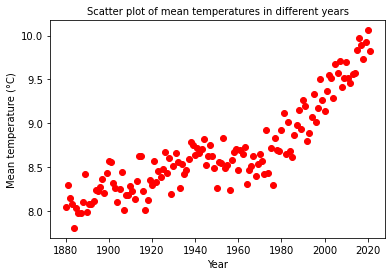

In [ ]:
# Plot for each year (x-axis) vs. the "mean_temp_year" value (y-axis)

plt.scatter(years, mean_temp_year, c ="red")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean temperature (°C)', fontsize=10)
plt.title('Scatter plot of mean temperatures in different years', fontsize=10);

<!-- END QUESTION -->

### 3D. Calculate the mean anomaly by month
Create an `Int64Index` index of `months` and an array of `mean_anomaly_month` with the mean anomaly for each month. 

In [ ]:
mean_anomaly_month = climate.groupby(climate['Month']).mean()['Anomaly']
months = mean_anomaly_month.keys().values

print('Months index:\n', months[0:5])
print('Means array:\n', mean_anomaly_month[0:5])

Months index:
 [1 2 3 4 5]
Means array:
 Month
1   -0.027709
2    0.009081
3    0.247013
4    0.406650
5    0.277077
Name: Anomaly, dtype: float64


In [ ]:
grader.check("p1_q3d")

p1_q3d results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3E. Plot mean anomaly by month in a bar chart

Be sure to include a plot title, x-axis label, y-axis label, and black horizontal line at 0 mean anomaly on the plot. This will help to visually reference positive and negative bars.

Label xticks with abbreviations for months: Jan, Feb, Mar, Apr, ...

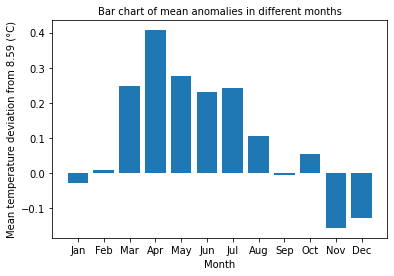

In [ ]:
# Plot the mean anomaly by month vs month in a bar chart
#  Make sure there is a horizontal line for 0 mean anomaly on the plot
#  Label xticks with abbreviations for months: Jan, Feb, Mar, Apr, ...
months_labels = pd.Series(pd.to_datetime(months, format='%m')).dt.strftime('%b')
plt.bar(months_labels, mean_anomaly_month)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Mean temperature deviation from 8.59 (°C)', fontsize=10)
plt.title('Bar chart of mean anomalies in different months', fontsize=10);


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3F. Plot a histogram of the Anomaly data.
Be sure to include a plot title, x-axis label, and y-axis label.

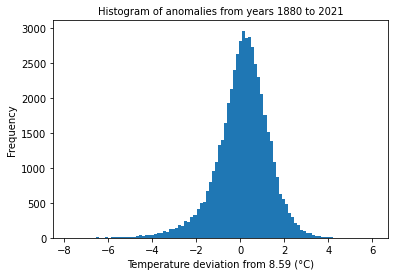

In [ ]:
plt.hist(climate['Anomaly'], bins = 100)
plt.xlabel('Temperature deviation from 8.59 (°C)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of anomalies from years 1880 to 2021', fontsize=10);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3G. Bonus 

#### (1) Recreate the plot from 3C  
Add a horizontal line at the estimated land-average temp. 




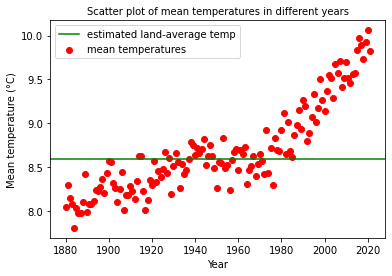

In [ ]:
plt.scatter(years, mean_temp_year, c ="red")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean temperature (°C)', fontsize=10)
plt.title('Scatter plot of mean temperatures in different years', fontsize=10)
plt.axhline(y=8.59, color='green', linestyle='-')
plt.legend(("estimated land-average temp", "mean temperatures"));

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### (2) Recreate the plot from 3E 
Color the positive bars in black and the negative bars in red.

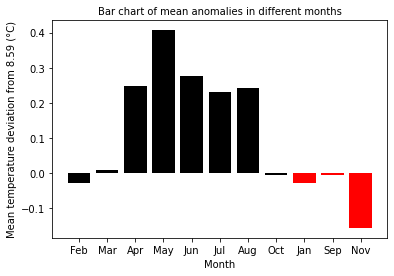

In [ ]:
months_labels = pd.Series(pd.to_datetime(months, format='%m')).dt.strftime('%b')

pos_i, neg_i = [], []
for i in range(0, len(months_labels)-1):
    if np.array(mean_anomaly_month)[i] >= 0:
        pos_i.append(i)
    else:
        neg_i.append(i)
pos_x = months_labels[pos_i]
pos_y = mean_anomaly_month[pos_i]
neg_x = months_labels[neg_i]
neg_y = np.array(mean_anomaly_month)[neg_i]

plt.figure()
plt.bar(pos_x, pos_y, color = 'black')
plt.bar(neg_x, neg_y, color = 'red')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Mean temperature deviation from 8.59 (°C)', fontsize=10)
plt.title('Bar chart of mean anomalies in different months', fontsize=10)
plt.show();

<!-- END QUESTION -->

